In [1]:
%run ./__init__.py

# Accessing AnnData


In [ ]:
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [ ]:
dataRoot = "data/vcc_data"
tr_adata_path = f"{dataRoot}/adata_Training.h5ad"
pertPath = f"{dataRoot}/pert_counts_Validation.csv"
pcounts = pd.read_csv(pertPath)
adata = ad.read_h5ad(tr_adata_path)
sampleBatch= "Flex_1_01"

# Batch Embedding Process

In [8]:
adata[(adata.obs['batch']==sampleBatch) & (adata.obs.target_gene == "non-targeting")].obs.shape[0]

749

In [14]:
adata[(adata.obs['batch']==sampleBatch) & (adata.obs.target_gene == "non-targeting")].X.toarray().std(axis=0).shape

(18080,)

In [17]:
dic = {'abc':25}
dic['abc']

25

In [9]:
for batch in adata.obs['batch'].unique():
    print(adata[(adata.obs['batch']==batch) & (adata.obs.target_gene == "non-targeting")].obs.shape[0])

749
733
765
771
775
779
735
767
709
793
765
753
797
780
838
730
770
713
757
825
769
771
793
810
816
785
780
707
782
833
791
808
768
897
854
855
805
868
875
816
807
879
845
784
858
845
865
806


# Data Analysis

In [4]:
adata.obs[adata.obs.batch == sampleBatch]

,target_gene,guide_id,batch
AAACAAGCAACCTTGTACTTTAGG-Flex_1_01,CHMP3,CHMP3_P1P2_A|CHMP3_P1P2_B,Flex_1_01
AAACAAGCATTGCCGCACTTTAGG-Flex_1_01,AKT2,AKT2_P1P2_A|AKT2_P1P2_B,Flex_1_01
AAACCAATCAATGTTCACTTTAGG-Flex_1_01,SHPRH,SHPRH_P1P2_A|SHPRH_P1P2_B,Flex_1_01
AAACCAATCCCTCGCTACTTTAGG-Flex_1_01,TMSB4X,TMSB4X_P1_A|TMSB4X_P1_B,Flex_1_01
AAACCAATCTAAATCCACTTTAGG-Flex_1_01,KLF10,KLF10_P2_A|KLF10_P2_B,Flex_1_01
...,...,...,...
TTTGGCGGTTTCACCCACTTTAGG-Flex_1_01,RNF2,RNF2_P1P2_A|RNF2_P1P2_B,Flex_1_01
TTTGTGAGTCAATTCAACTTTAGG-Flex_1_01,EID2,EID2_P1P2_A|EID2_P1P2_B,Flex_1_01
TTTGTGAGTCACACCAACTTTAGG-Flex_1_01,non-targeting,non-targeting_00005|non-targeting_01689,Flex_1_01
TTTGTGAGTCCATTAAACTTTAGG-Flex_1_01,TARBP2,TARBP2_P1P2_A|TARBP2_P1P2_B,Flex_1_01


## Inside batch distribution

<Axes: xlabel='target_gene'>

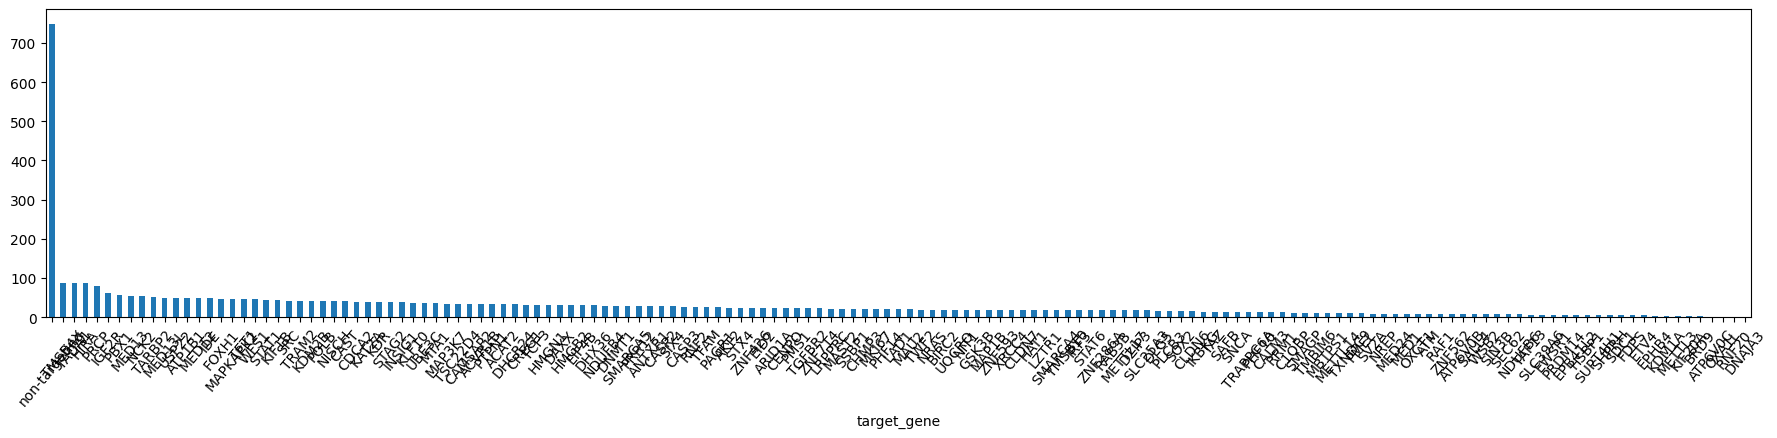

In [5]:
plt.figure(figsize = (22,4))
adata.obs[adata.obs.batch == sampleBatch].target_gene.value_counts().plot(kind = 'bar',rot = 50)

## Exploring indexes
So far I thought these cell barcodes are containing expression levels or some amino acid sequence.

In [6]:
#! Don't make my mistake
# All the indexes/barcodes are unique, therefore they can't be used for expression levels....
adata.obs.index.is_unique
# This concludes that all the barcodes are unique
# Should've started here...

True

In [7]:
adata.obs.index[0], adata.obs.index[1]

('AAACAAGCAACCTTGTACTTTAGG-Flex_1_01', 'AAACAAGCATTGCCGCACTTTAGG-Flex_1_01')

In [8]:
adata.obs.index[0] == adata.obs.index[1] 

False

In [9]:
vcounts = adata.obs.loc[(adata.obs.target_gene == "non-targeting") & (adata.obs.batch == sampleBatch )].index.value_counts().to_numpy()

(array([  0.,   0.,   0.,   0.,   0., 749.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

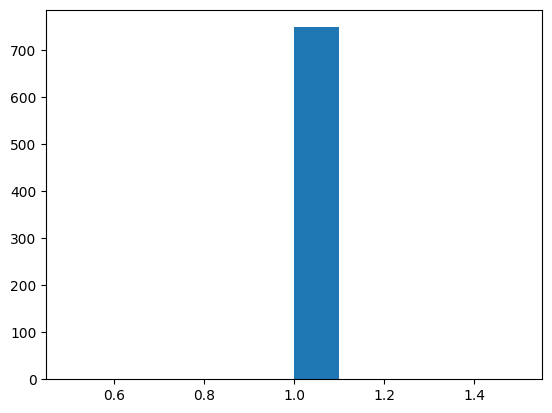

In [10]:
plt.hist(vcounts)
# So every cell bar code is unique
# The question is what encodes the expression level then?

In [11]:
batches = adata.obs.batch.unique()
len(batches)

48

In [12]:
adata.obs.index.is_unique
# This concludes that all the barcodes are unique
# Should've started here...

True

## Looking for input varriable

In [13]:
adata.obs[(adata.obs.target_gene == "non-targeting") & (adata.obs.batch == sampleBatch )]

,target_gene,guide_id,batch
AAACTGGGTAACCCATACTTTAGG-Flex_1_01,non-targeting,non-targeting_00021|non-targeting_03430,Flex_1_01
AAAGCATGTTGTCATAACTTTAGG-Flex_1_01,non-targeting,non-targeting_00077|non-targeting_01678,Flex_1_01
AAAGCGAAGCTAAATGACTTTAGG-Flex_1_01,non-targeting,non-targeting_00047|non-targeting_00882,Flex_1_01
AAAGCGAAGGGCGGTTACTTTAGG-Flex_1_01,non-targeting,non-targeting_00116|non-targeting_02560,Flex_1_01
AAAGGTACACGGTAACACTTTAGG-Flex_1_01,non-targeting,non-targeting_00018|non-targeting_00127,Flex_1_01
...,...,...,...
TTTATGGGTGCTTCTCACTTTAGG-Flex_1_01,non-targeting,non-targeting_00077|non-targeting_01678,Flex_1_01
TTTCGCGCATTGCCGCACTTTAGG-Flex_1_01,non-targeting,non-targeting_00065|non-targeting_02434,Flex_1_01
TTTGCGGGTTGGCCACACTTTAGG-Flex_1_01,non-targeting,non-targeting_00035|non-targeting_03439,Flex_1_01
TTTGCTGAGGCGATATACTTTAGG-Flex_1_01,non-targeting,non-targeting_00014|non-targeting_00031,Flex_1_01


In [14]:
# Thought 2 -> maybe this median umi per cell shoul be the input varriable?
# It seems no... Since we don't have this for the non-targeting reference cell.

pcounts[pcounts.target_gene == "non-targeting"]
adata.var[adata.var.index == "CHMP3"]

,gene_id
CHMP3,ENSG00000115561


In [15]:
xsparse = adata[adata.obs.batch == sampleBatch][0].X.toarray()

In [16]:
xsparse = adata[adata.obs.batch == sampleBatch].X.toarray()
xsparse

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 2., 1.],
       ...,
       [0., 2., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 3., 1.],
       [0., 4., 0., ..., 0., 5., 7.]], shape=(4339, 18080), dtype=float32)

In [17]:
np.unique(xsparse)

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01,
       2.400e+01, 2.500e+01, 2.600e+01, 2.700e+01, 2.800e+01, 2.900e+01,
       3.000e+01, 3.100e+01, 3.200e+01, 3.300e+01, 3.400e+01, 3.500e+01,
       3.600e+01, 3.700e+01, 3.800e+01, 3.900e+01, 4.000e+01, 4.100e+01,
       4.200e+01, 4.300e+01, 4.400e+01, 4.500e+01, 4.600e+01, 4.700e+01,
       4.800e+01, 4.900e+01, 5.000e+01, 5.100e+01, 5.200e+01, 5.300e+01,
       5.400e+01, 5.500e+01, 5.600e+01, 5.700e+01, 5.800e+01, 5.900e+01,
       6.000e+01, 6.100e+01, 6.200e+01, 6.300e+01, 6.400e+01, 6.500e+01,
       6.600e+01, 6.700e+01, 6.800e+01, 6.900e+01, 7.000e+01, 7.100e+01,
       7.200e+01, 7.300e+01, 7.400e+01, 7.500e+01, 7.600e+01, 7.700e+01,
       7.800e+01, 7.900e+01, 8.000e+01, 8.100e+01, 

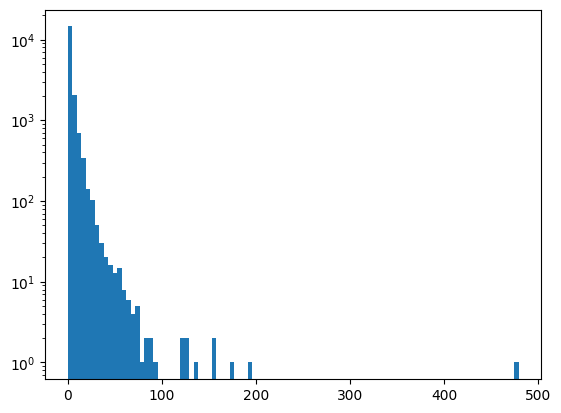

In [18]:
# Finally found the distrubutin which we actually want to look for
plt.hist(xsparse[0], bins = 100, log = True)
None

# Batch expression distribution

In [19]:
adata.obs[(adata.obs.target_gene == "non-targeting") & (adata.obs.batch == sampleBatch )]

,target_gene,guide_id,batch
AAACTGGGTAACCCATACTTTAGG-Flex_1_01,non-targeting,non-targeting_00021|non-targeting_03430,Flex_1_01
AAAGCATGTTGTCATAACTTTAGG-Flex_1_01,non-targeting,non-targeting_00077|non-targeting_01678,Flex_1_01
AAAGCGAAGCTAAATGACTTTAGG-Flex_1_01,non-targeting,non-targeting_00047|non-targeting_00882,Flex_1_01
AAAGCGAAGGGCGGTTACTTTAGG-Flex_1_01,non-targeting,non-targeting_00116|non-targeting_02560,Flex_1_01
AAAGGTACACGGTAACACTTTAGG-Flex_1_01,non-targeting,non-targeting_00018|non-targeting_00127,Flex_1_01
...,...,...,...
TTTATGGGTGCTTCTCACTTTAGG-Flex_1_01,non-targeting,non-targeting_00077|non-targeting_01678,Flex_1_01
TTTCGCGCATTGCCGCACTTTAGG-Flex_1_01,non-targeting,non-targeting_00065|non-targeting_02434,Flex_1_01
TTTGCGGGTTGGCCACACTTTAGG-Flex_1_01,non-targeting,non-targeting_00035|non-targeting_03439,Flex_1_01
TTTGCTGAGGCGATATACTTTAGG-Flex_1_01,non-targeting,non-targeting_00014|non-targeting_00031,Flex_1_01


In [20]:
xsparse = adata[adata.obs.batch == sampleBatch].X.toarray()

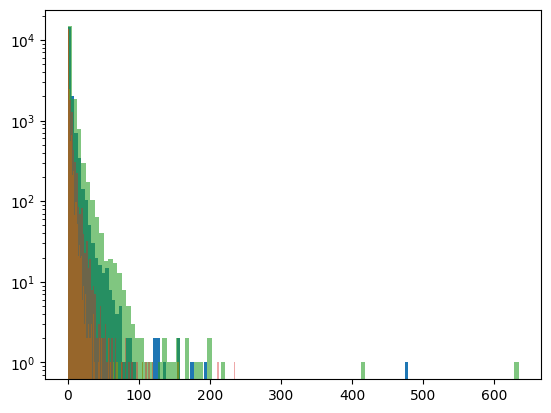

In [21]:

plt.hist(xsparse[0],bins = 100,log = True)
plt.hist(xsparse[1],bins = 100,log = True, alpha = 0.8)
plt.hist(xsparse[2],bins = 100,log = True, alpha = 0.6)
plt.hist(xsparse[3],bins = 100,log = True, alpha = 0.4)
None


# Embedding checking

In [22]:
xsparse = adata[adata.obs.batch == sampleBatch].X.toarray()

In [23]:
adata.obs[adata.obs.target_gene == "CHMP3"]

,target_gene,guide_id,batch
AAACAAGCAACCTTGTACTTTAGG-Flex_1_01,CHMP3,CHMP3_P1P2_A|CHMP3_P1P2_B,Flex_1_01
AACGTTCGTTGCACTGACTTTAGG-Flex_1_01,CHMP3,CHMP3_P1P2_A|CHMP3_P1P2_B,Flex_1_01
AAGGCTGTCCCTGGTGACTTTAGG-Flex_1_01,CHMP3,CHMP3_P1P2_A|CHMP3_P1P2_B,Flex_1_01
ACCAACTGTGTCCAGCACTTTAGG-Flex_1_01,CHMP3,CHMP3_P1P2_A|CHMP3_P1P2_B,Flex_1_01
ACCACGTTCATCAGCCACTTTAGG-Flex_1_01,CHMP3,CHMP3_P1P2_A|CHMP3_P1P2_B,Flex_1_01
...,...,...,...
TGATTGCGTCGAAGGTATTCGGTT-Flex_3_16,CHMP3,CHMP3_P1P2_A|CHMP3_P1P2_B,Flex_3_16
TGGGTCCGTGAACCAAATTCGGTT-Flex_3_16,CHMP3,CHMP3_P1P2_A|CHMP3_P1P2_B,Flex_3_16
TGTAACCGTAGGTGACATTCGGTT-Flex_3_16,CHMP3,CHMP3_P1P2_A|CHMP3_P1P2_B,Flex_3_16
TGTTGCATCTTTGGTGATTCGGTT-Flex_3_16,CHMP3,CHMP3_P1P2_A|CHMP3_P1P2_B,Flex_3_16


In [43]:

batch_size = 32
xsparse[:batch_size].shape

(32, 18080)

In [50]:
adata.X.toarray()

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 2., 1.],
       ...,
       [0., 3., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 2., 1.]],
      shape=(221273, 18080), dtype=float32)

In [25]:
adata[adata.obs.batch == sampleBatch].obs.target_gene.to_numpy()

array(['CHMP3', 'AKT2', 'SHPRH', ..., 'non-targeting', 'TARBP2', 'IDE'],
      shape=(4339,), dtype=object)

In [26]:
vis_embed = TSNE(3)
xNew = vis_embed.fit_transform(xsparse)

In [27]:
df = pd.DataFrame({"x":xNew[:,0],"y":xNew[:,1],"z":xNew[:,2],"class":adata[adata.obs.batch == sampleBatch].obs.target_gene.to_numpy()})

<Axes: xlabel='y', ylabel='z'>

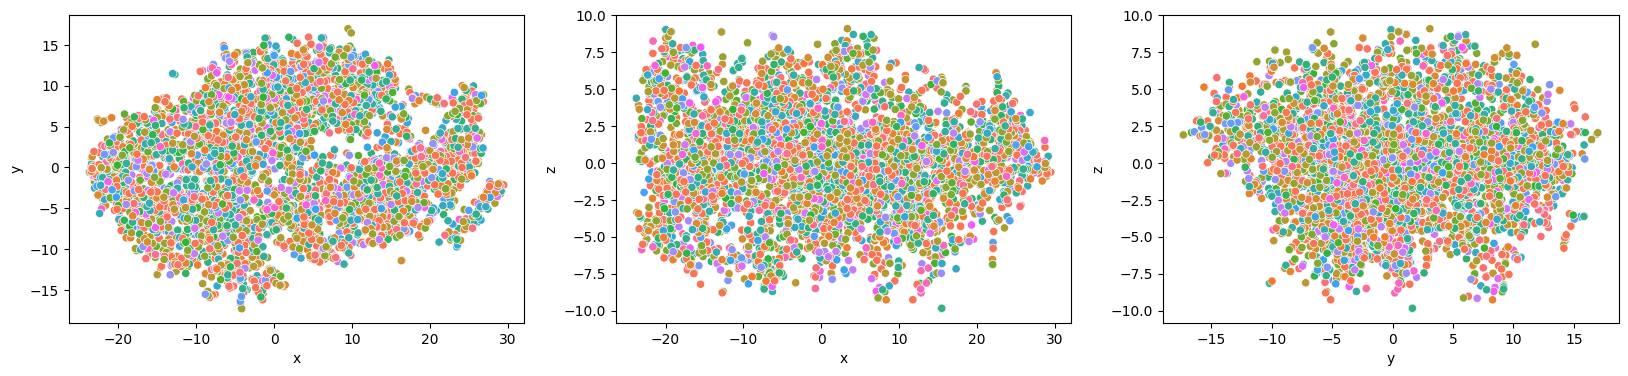

In [28]:
plt.figure(figsize = (20,4))
plt.subplot(131)
sns.scatterplot(data = df,x = 'x',y = "y",hue="class",legend = False)
plt.subplot(132)
sns.scatterplot(data = df,x = 'x',y = "z",hue="class",legend = False)
plt.subplot(133)
sns.scatterplot(data = df,x = 'y',y = "z",hue="class",legend = False)

In [29]:
batchData = adata[ (adata.obs.batch == sampleBatch) & (adata.obs.target_gene == "non-targeting")].X.toarray()

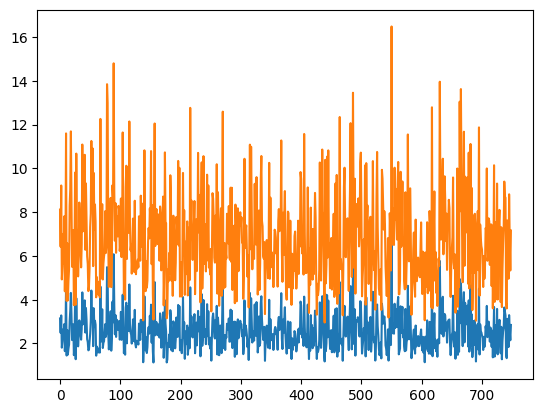

In [30]:
plt.plot(batchData.mean(axis = 1))
plt.plot(batchData.std(axis = 1))

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
x1,x2 = batchData[0],batchData[1]
perturbs = adata[ (adata.obs.batch == sampleBatch) & (adata.obs.target_gene != "non-targeting")].X.toarray()
y1 = perturbs[1]


In [33]:
def get_sim(a,b):
    a_norm = np.linalg.norm(a)
    b_norm = np.linalg.norm(b)
    return (a@b)/(a_norm*b_norm)


In [34]:
x1 = batchData[0]
sims= []
for i in range(1,len(batchData)):
    x2 = batchData[i]
    sims.append( get_sim(x1,x2))

In [35]:
pertSims = []
x1 = batchData[0]
for j in range(len(perturbs)):
    y = perturbs[j]
    pertSims.append(get_sim(x1,y))

In [36]:
np.mean(pertSims)

np.float32(0.90857756)

In [37]:
np.mean(sims)

np.float32(0.91021633)

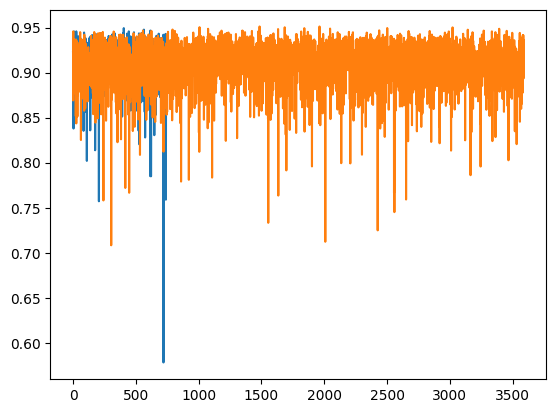

In [38]:
plt.plot(sims)
plt.plot(pertSims)

In [39]:
meanx, meany = [], []
for i in range(len(batchData)):
    sims= []
    x1 = batchData[i]
    for j in range(1,len(batchData)):
        x2 = batchData[j]
        sims.append( get_sim(x1,x2))
    xsim = np.mean(sims)
    meanx.append(xsim)
    pertSims = []
    for j in range(len(perturbs)):
        y = perturbs[j]
        pertSims.append(get_sim(x1,y))
    ysim = np.mean(pertSims)
    meany.append(ysim)

In [40]:
np.mean(meanx), np.mean(meany), np.std(meanx),np.std(meany)

(np.float32(0.8979306),
 np.float32(0.8953517),
 np.float32(0.021086335),
 np.float32(0.021073036))